In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
df = pd.read_csv("data/situacion-epidemiologica-coronavirus-en-castilla-y-leon.csv", delimiter=";")
df_hospitales = pd.read_csv("data/situacion-de-hospitalizados-por-coronavirus-en-castilla-y-leon.csv", delimiter=";")
df_at_primaria = pd.read_csv("data/situacion-afectados-por-coronavirus-en-atencion-primaria.csv", delimiter=";")

In [158]:
df

,fecha,provincia,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine,Posicion
0,2023-09-15,Palencia,68889.0,23.0,4580.0,767.0,34120,"42.432128,-4.520647"
1,2023-09-15,Soria,35769.0,2.0,2336.0,398.0,42173,"41.666667,-2.666667"
2,2023-09-15,Valladolid,199654.0,92.0,13620.0,1805.0,47186,"41.583333,-4.666667"
3,2023-09-15,Zamora,59752.0,23.0,4303.0,767.0,49275,"41.75,-6.0"
4,2023-09-15,Ávila,58089.0,28.0,3820.0,661.0,5019,"40.616092,-4.929031"
...,...,...,...,...,...,...,...,...
11488,2020-03-13,Soria,1.0,1.0,0.0,0.0,42173,"41.666667,-2.666667"
11489,2020-03-13,Ávila,3.0,3.0,0.0,0.0,5019,"40.616092,-4.929031"
11490,2020-03-13,León,32.0,22.0,0.0,0.0,24089,"42.666667,-6.0"
11491,2020-03-13,Palencia,1.0,1.0,0.0,0.0,34120,"42.432128,-4.520647"


In [159]:
list(df.columns)

['fecha',
 'provincia',
 'casos_confirmados',
 'nuevos_positivos',
 'altas',
 'fallecimientos',
 'codigo_ine',
 'Posicion']

In [160]:
list(df_at_primaria.columns)

['fecha',
 'provincia',
 'numero_enfermos',
 'tasa_enfermedad',
 'incremento_enfermos',
 'porcentaje_incremento',
 'codigo_ine',
 'posicion']

In [161]:
list(df_hospitales.columns)

['fecha',
 'hospital',
 'provincia',
 'nuevos_hospitalizados_planta',
 'hospitalizados_planta',
 'hospitalizados_planta_incluidos_sospecha',
 'nuevos_hospitalizados_uci',
 'hospitalizados_uci',
 'hospitalizados_uci_incluidos_sospecha',
 'porcentaje_ocupacion_uci',
 'nuevas_altas',
 'altas',
 'nuevos_fallecimientos',
 'fallecimientos',
 'codigo_ine',
 'posicion']

# Preprocesamiento

In [162]:
df['fecha'] = pd.to_datetime(df['fecha'])
df['fecha']

0       2023-09-15
1       2023-09-15
2       2023-09-15
3       2023-09-15
4       2023-09-15
           ...    
11488   2020-03-13
11489   2020-03-13
11490   2020-03-13
11491   2020-03-13
11492   2020-03-13
Name: fecha, Length: 11493, dtype: datetime64[ns]

In [163]:
df.describe()

,fecha,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine
count,11493,11312.000000,11344.000000,11159.000000,11160.000000,11493.000000
mean,2021-12-13 14:31:40.078308352,52731.704738,75.203632,3864.825343,688.837455,32022.111111
min,2020-03-13 00:00:00,1.000000,-2.000000,0.000000,0.000000,5019.000000
25%,2021-01-28 00:00:00,12514.000000,8.000000,1716.500000,355.750000,24089.000000
50%,2021-12-13 00:00:00,38393.000000,24.000000,2837.000000,512.000000,37274.000000
75%,2022-10-28 00:00:00,66214.250000,70.000000,5252.000000,1015.000000,42173.000000
max,2023-09-15 00:00:00,199654.000000,2830.000000,13620.000000,12364.000000,49275.000000
std,NaN,51247.665040,174.582057,3104.274853,523.851005,15077.300892


In [164]:
df

,fecha,provincia,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine,Posicion
0,2023-09-15,Palencia,68889.0,23.0,4580.0,767.0,34120,"42.432128,-4.520647"
1,2023-09-15,Soria,35769.0,2.0,2336.0,398.0,42173,"41.666667,-2.666667"
2,2023-09-15,Valladolid,199654.0,92.0,13620.0,1805.0,47186,"41.583333,-4.666667"
3,2023-09-15,Zamora,59752.0,23.0,4303.0,767.0,49275,"41.75,-6.0"
4,2023-09-15,Ávila,58089.0,28.0,3820.0,661.0,5019,"40.616092,-4.929031"
...,...,...,...,...,...,...,...,...
11488,2020-03-13,Soria,1.0,1.0,0.0,0.0,42173,"41.666667,-2.666667"
11489,2020-03-13,Ávila,3.0,3.0,0.0,0.0,5019,"40.616092,-4.929031"
11490,2020-03-13,León,32.0,22.0,0.0,0.0,24089,"42.666667,-6.0"
11491,2020-03-13,Palencia,1.0,1.0,0.0,0.0,34120,"42.432128,-4.520647"


In [165]:
df_hospitales['fecha'] = pd.to_datetime(df_hospitales['fecha'])
df_at_primaria['fecha']= pd.to_datetime(df_at_primaria['fecha'])

# Visualización

## Visualización temporal de los parámetros

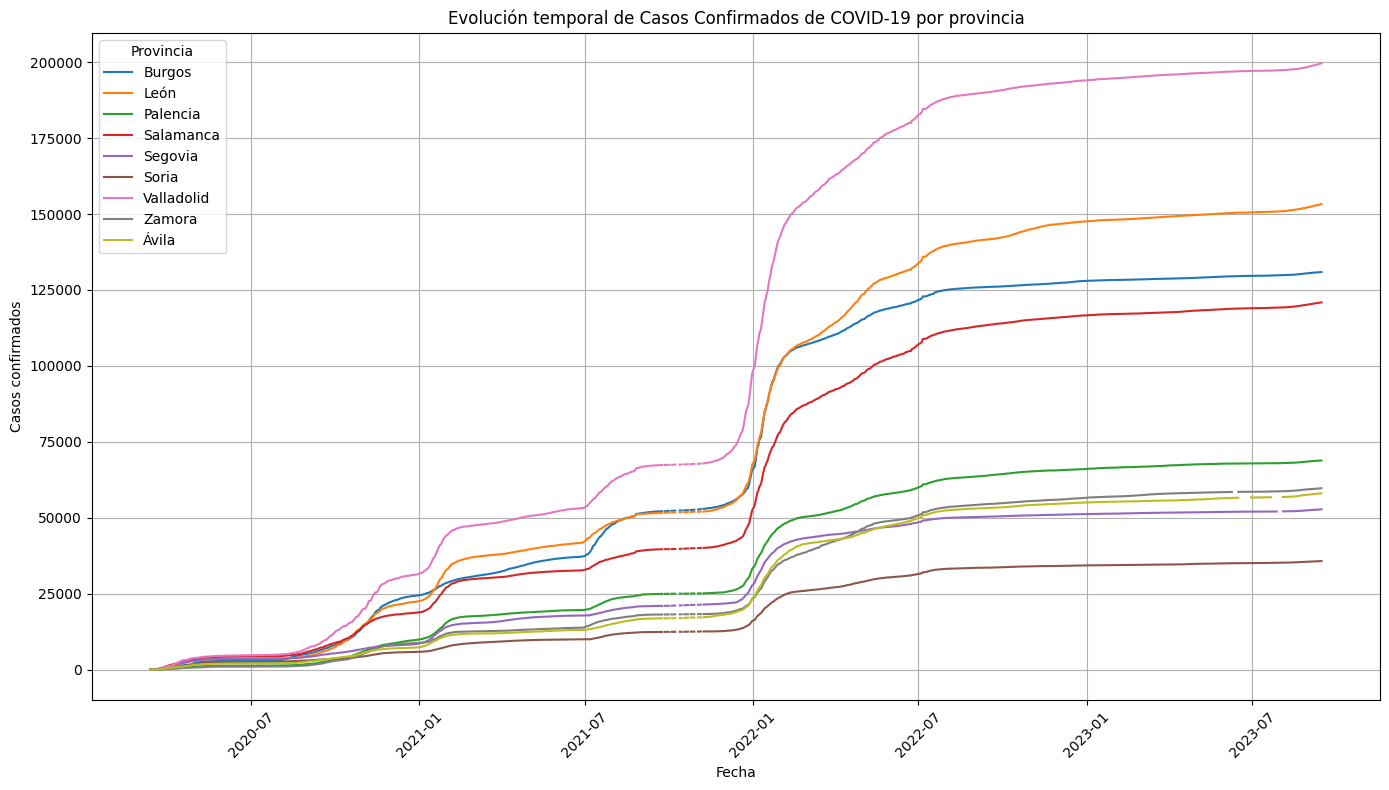

In [166]:
# Representación de la Evolución temporal de Casos Confirmados de COVID-19 por provincia 
pivot_df = df.pivot(index='fecha', columns='provincia', values='casos_confirmados')

# Plot the data
plt.figure(figsize=(14, 8))
for province in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[province], label=province)

plt.title('Evolución temporal de Casos Confirmados de COVID-19 por provincia')
plt.xlabel('Fecha')
plt.ylabel('Casos confirmados')
plt.legend(title='Provincia', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

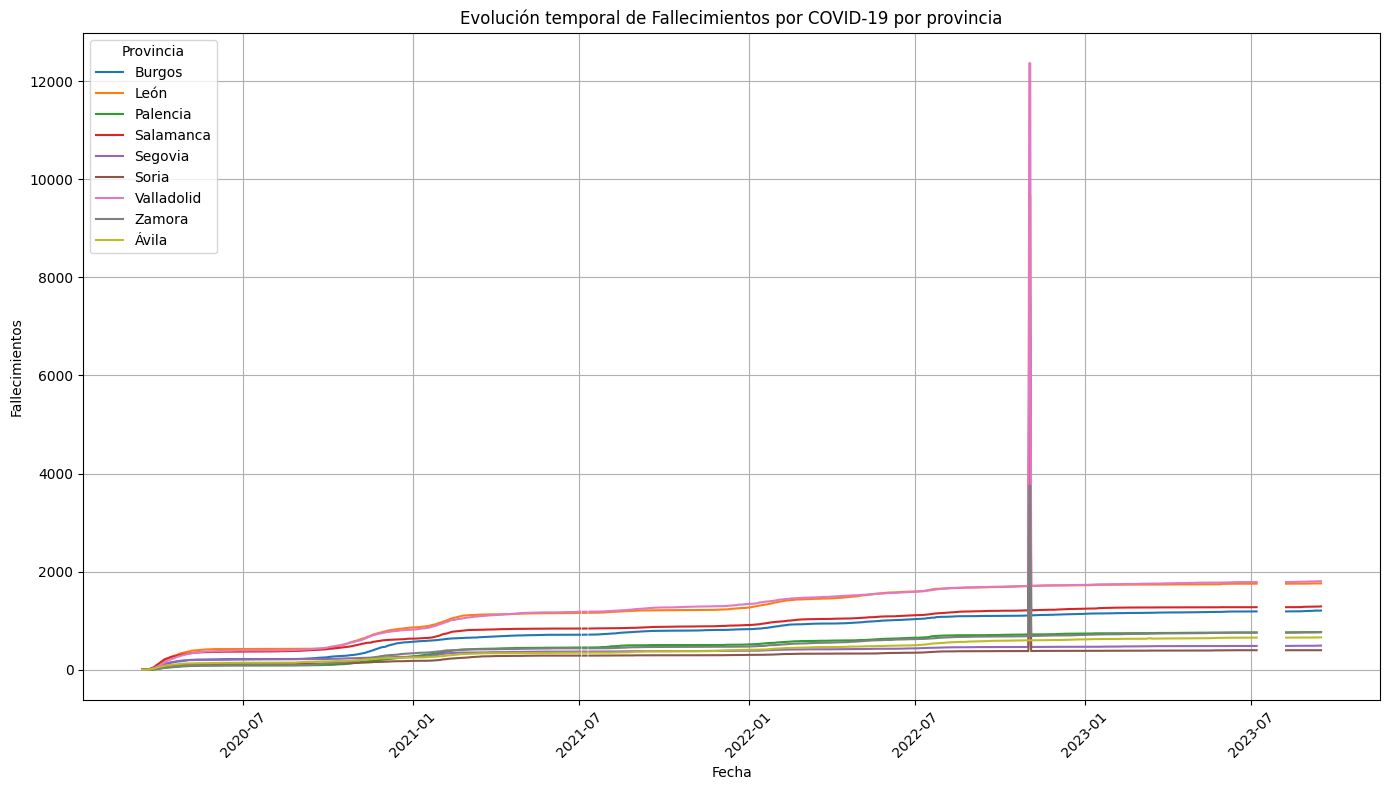

In [167]:
#Representación de la Evolución temporal de Fallecimientos por COVID-19 por provincia
pivot_df = df.pivot(index='fecha', columns='provincia', values='fallecimientos')


plt.figure(figsize=(14, 8))
for province in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[province], label=province)

plt.title('Evolución temporal de Fallecimientos por COVID-19 por provincia')
plt.xlabel('Fecha')
plt.ylabel('Fallecimientos')
plt.legend(title='Provincia', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

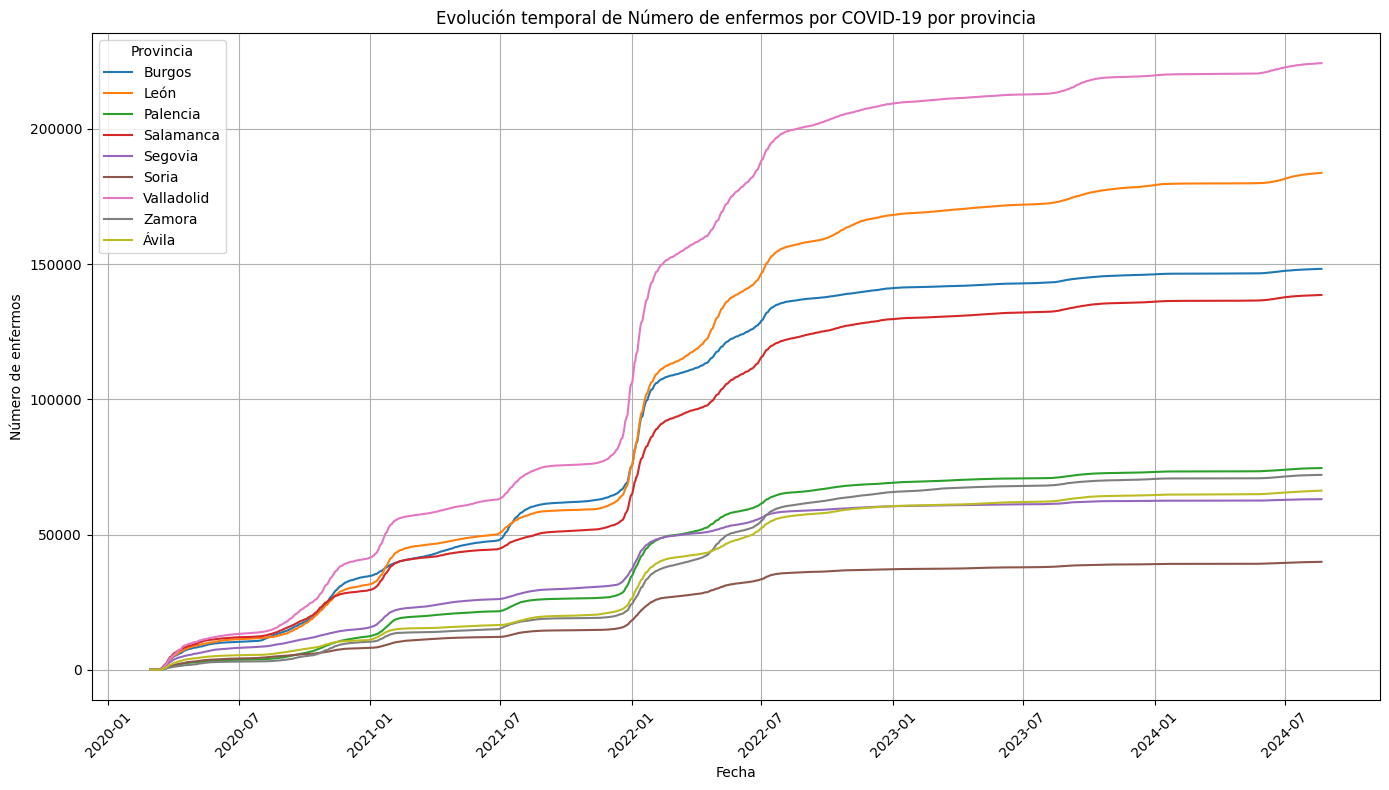

In [168]:
#Representación de la Evolución temporal de Número de enfermos por COVID-19 por provincia
pivot_df_at_primaria = df_at_primaria.pivot(index='fecha', columns='provincia', values='numero_enfermos')

plt.figure(figsize=(14, 8))
for province in pivot_df_at_primaria.columns:
    plt.plot(pivot_df_at_primaria.index, pivot_df_at_primaria[province], label=province)

plt.title('Evolución temporal de Número de enfermos por COVID-19 por provincia')
plt.xlabel('Fecha')
plt.ylabel('Número de enfermos')
plt.legend(title='Provincia', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

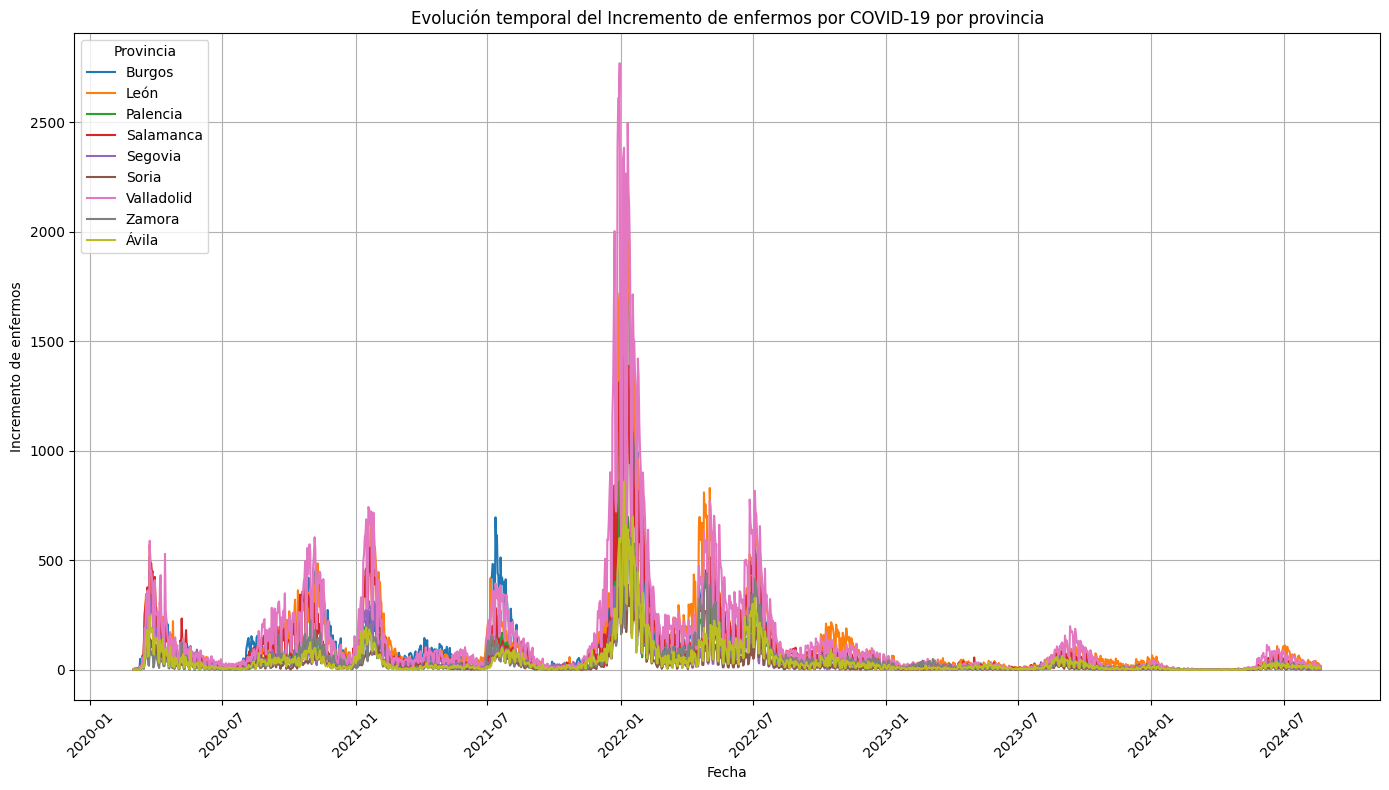

In [169]:
# Representación de la Evolución temporal del Incremento de enfermos por COVID-19 por provincia
pivot_df_at_primaria = df_at_primaria.pivot(index='fecha', columns='provincia', values='incremento_enfermos')

plt.figure(figsize=(14, 8))
for province in pivot_df_at_primaria.columns:
    plt.plot(pivot_df_at_primaria.index, pivot_df_at_primaria[province], label=province)

plt.title('Evolución temporal del Incremento de enfermos por COVID-19 por provincia')
plt.xlabel('Fecha')
plt.ylabel('Incremento de enfermos')
plt.legend(title='Provincia', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

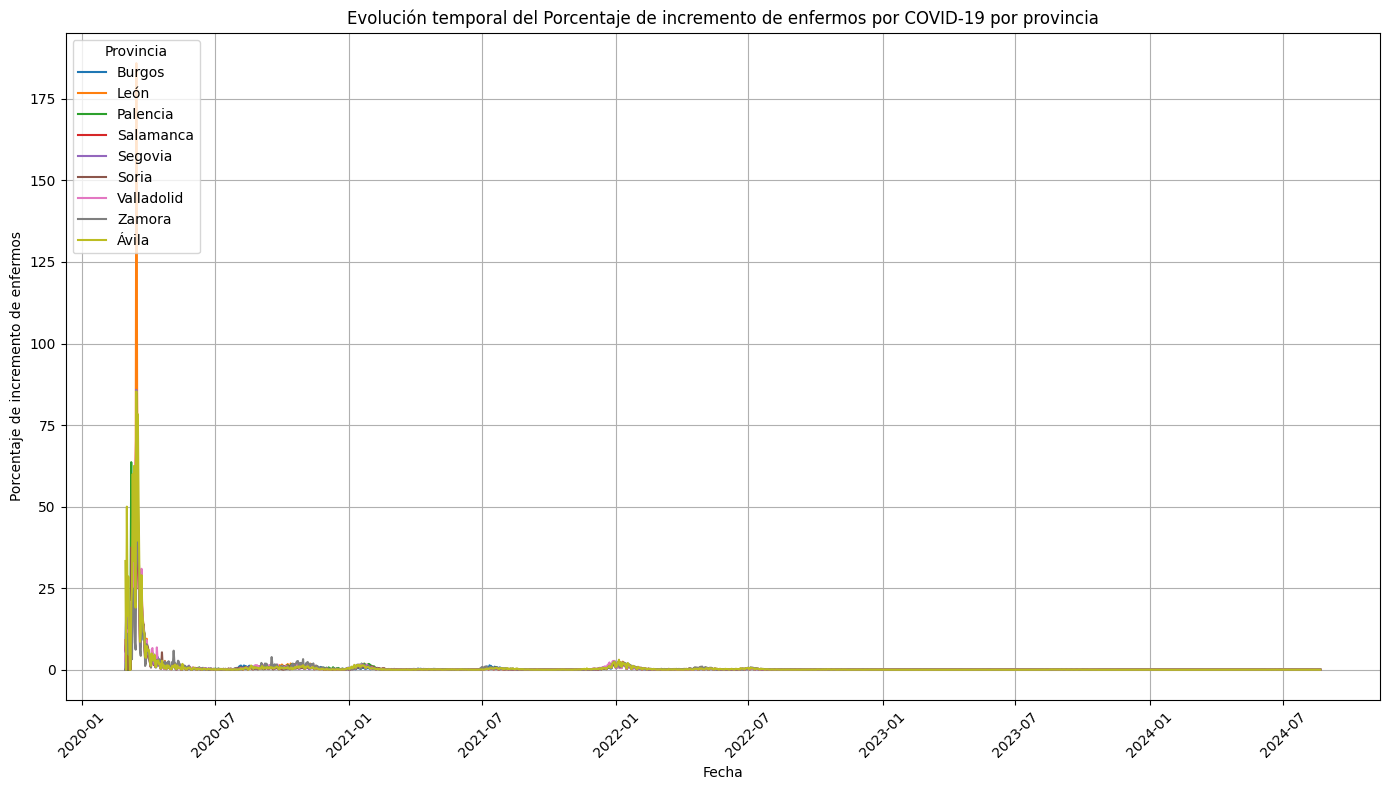

In [170]:
#Representación de la Evolución temporal del Porcentaje de incremento de enfermos por COVID-19 por provincia
pivot_df_at_primaria = df_at_primaria.pivot(index='fecha', columns='provincia', values='porcentaje_incremento')

plt.figure(figsize=(14, 8))
for province in pivot_df_at_primaria.columns:
    plt.plot(pivot_df_at_primaria.index, pivot_df_at_primaria[province], label=province)

plt.title('Evolución temporal del Porcentaje de incremento de enfermos por COVID-19 por provincia')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje de incremento de enfermos')
plt.legend(title='Provincia', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

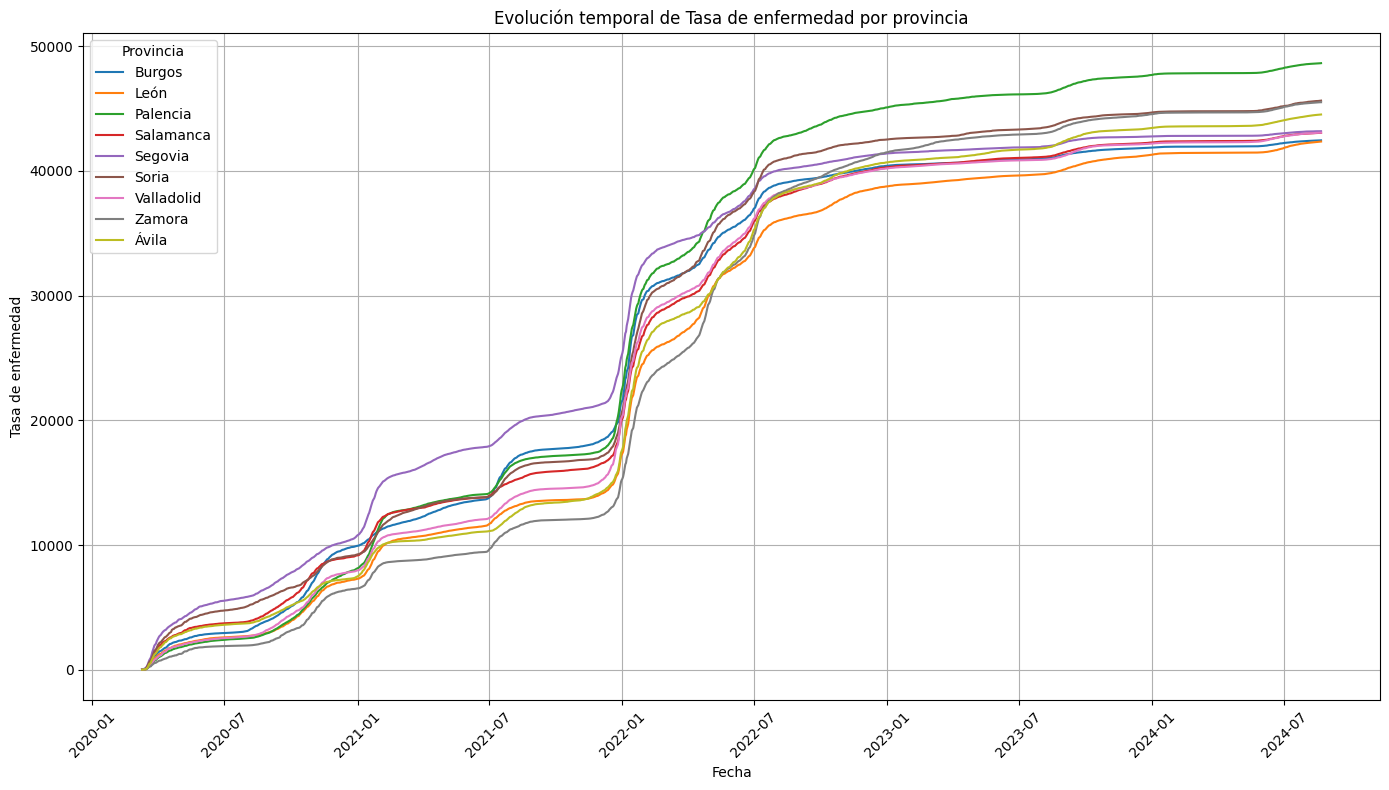

In [171]:
# Representación de la Evolución temporal de Tasa de enfermedad por provincia
pivot_df_at_primaria = df_at_primaria.pivot(index='fecha', columns='provincia', values='tasa_enfermedad')

plt.figure(figsize=(14, 8))
for province in pivot_df_at_primaria.columns:
    plt.plot(pivot_df_at_primaria.index, pivot_df_at_primaria[province], label=province)

plt.title('Evolución temporal de Tasa de enfermedad por provincia')
plt.xlabel('Fecha')
plt.ylabel('Tasa de enfermedad')
plt.legend(title='Provincia', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

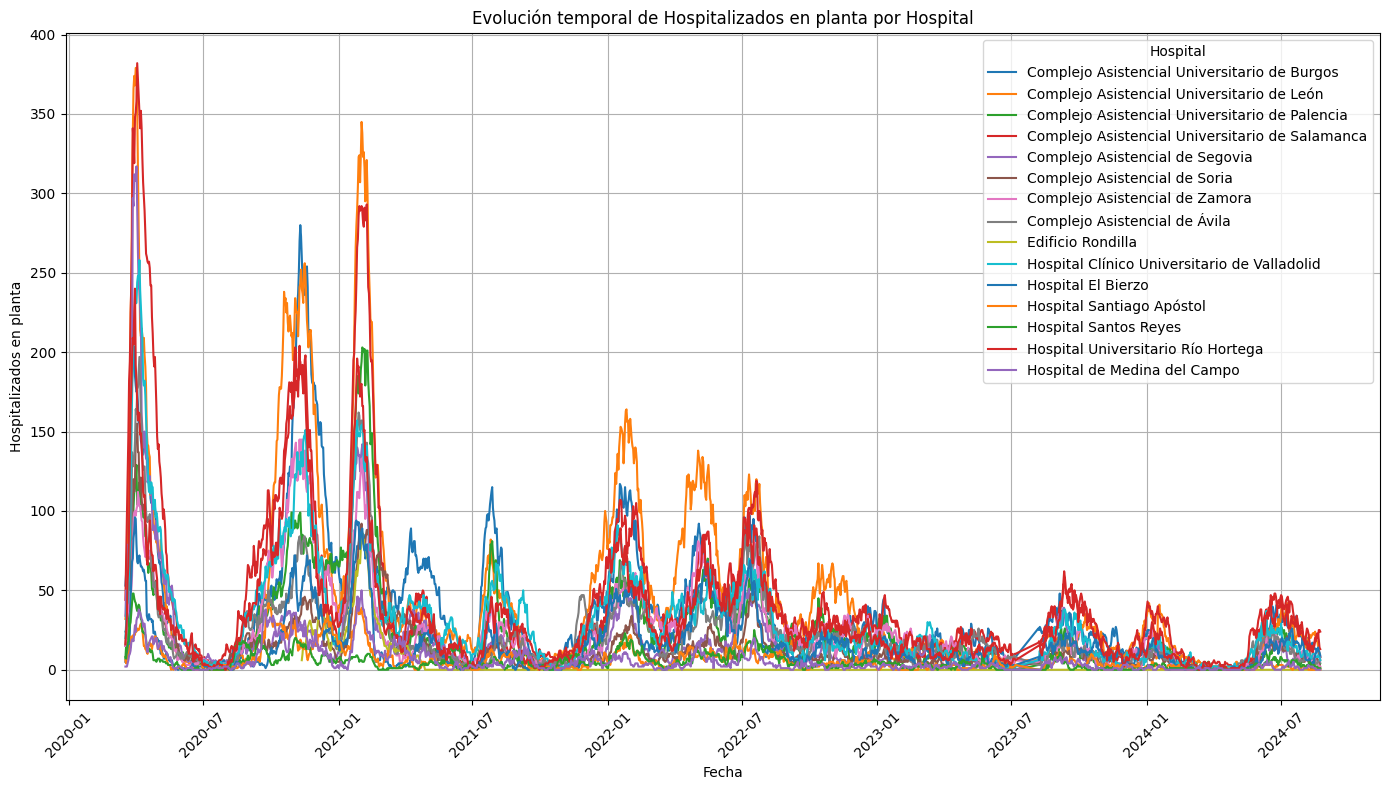

In [172]:
#Representación de la Evolución temporal de Hospitalizados en planta por Hospital
pivot_df_hospitales = df_hospitales.pivot(index='fecha', columns='hospital', values='hospitalizados_planta')
plt.figure(figsize=(14, 8))
for hospital in pivot_df_hospitales.columns:
    plt.plot(pivot_df_hospitales.index, pivot_df_hospitales[hospital], label=hospital)

plt.title('Evolución temporal de Hospitalizados en planta por Hospital')
plt.xlabel('Fecha')
plt.ylabel('Hospitalizados en planta')
plt.legend(title='Hospital', loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

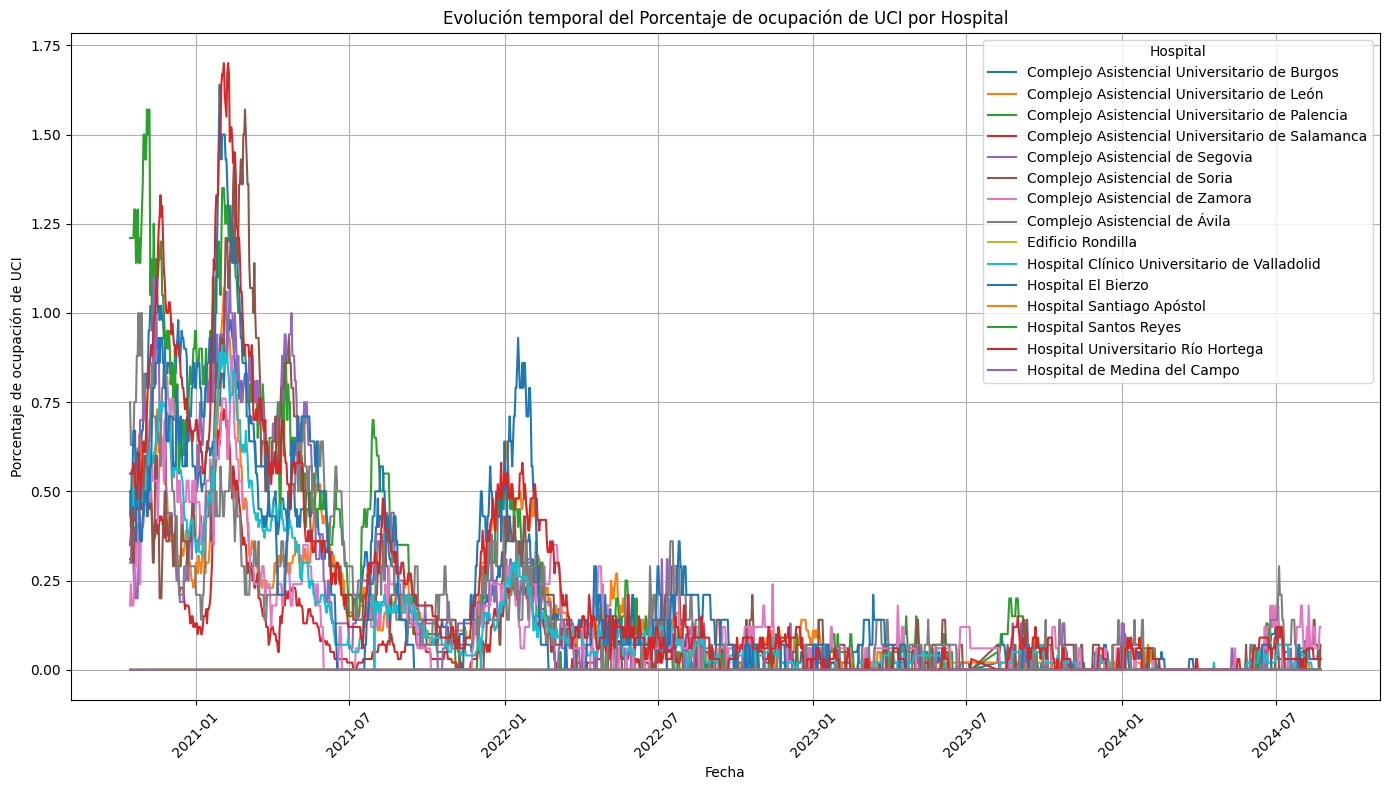

In [173]:
#Representación de la Evolución temporal del Porcentaje de ocupación de UCI por Hospital
pivot_df_hospitales = df_hospitales.pivot(index='fecha', columns='hospital', values='porcentaje_ocupacion_uci')
plt.figure(figsize=(14, 8))
for hospital in pivot_df_hospitales.columns:
    plt.plot(pivot_df_hospitales.index, pivot_df_hospitales[hospital], label=hospital)

plt.title('Evolución temporal del Porcentaje de ocupación de UCI por Hospital')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje de ocupación de UCI')
plt.legend(title='Hospital', loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Visualización comparativa de parámetros

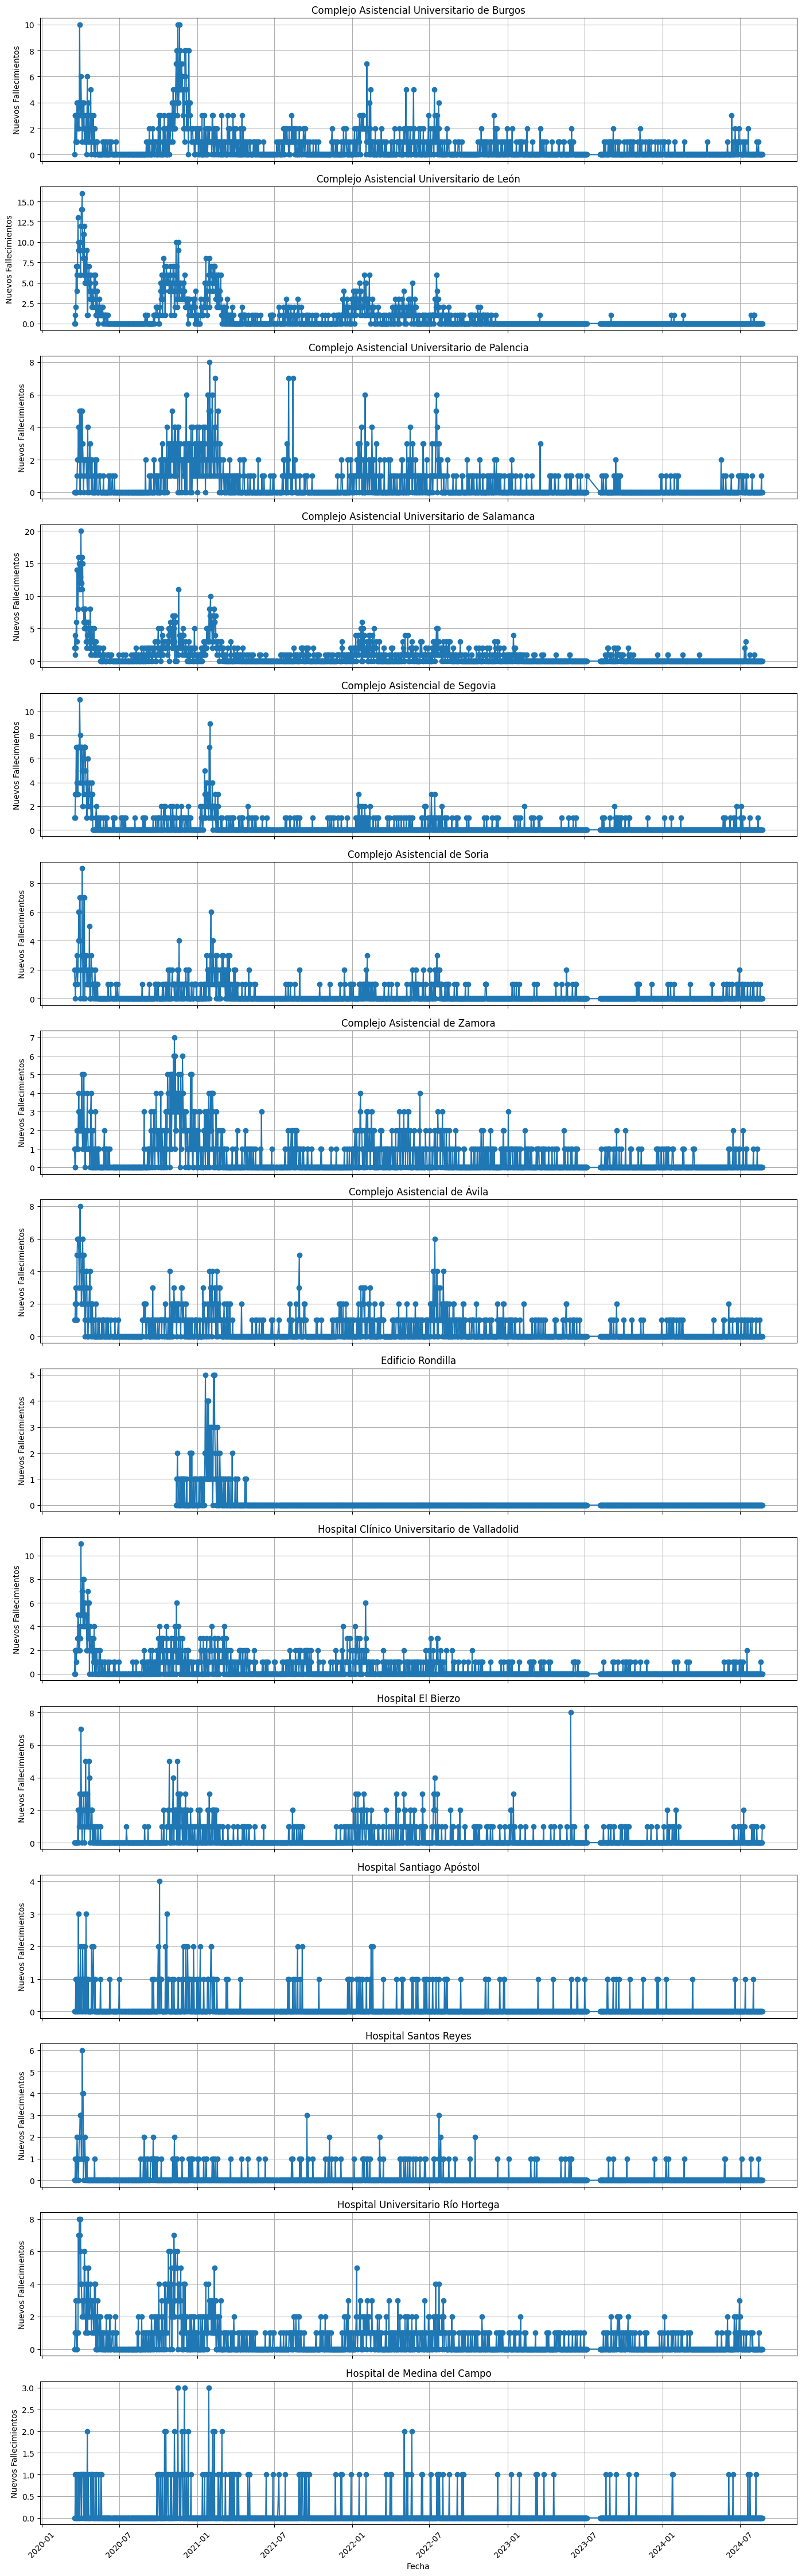

In [174]:
# Representación comparativa por hospitales del número de nuevos fallecimientos
pivot_df = df_hospitales.pivot(index='fecha', columns='hospital', values='nuevos_fallecimientos')

n_hospitals = len(pivot_df.columns)
fig, axs = plt.subplots(n_hospitals, 1, figsize=(14, n_hospitals * 3), sharex=True)


for i, hospital in enumerate(pivot_df.columns):
    axs[i].plot(pivot_df.index, pivot_df[hospital], marker='o')
    axs[i].set_title(hospital)
    axs[i].set_ylabel('Nuevos Fallecimientos')
    axs[i].grid()

plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


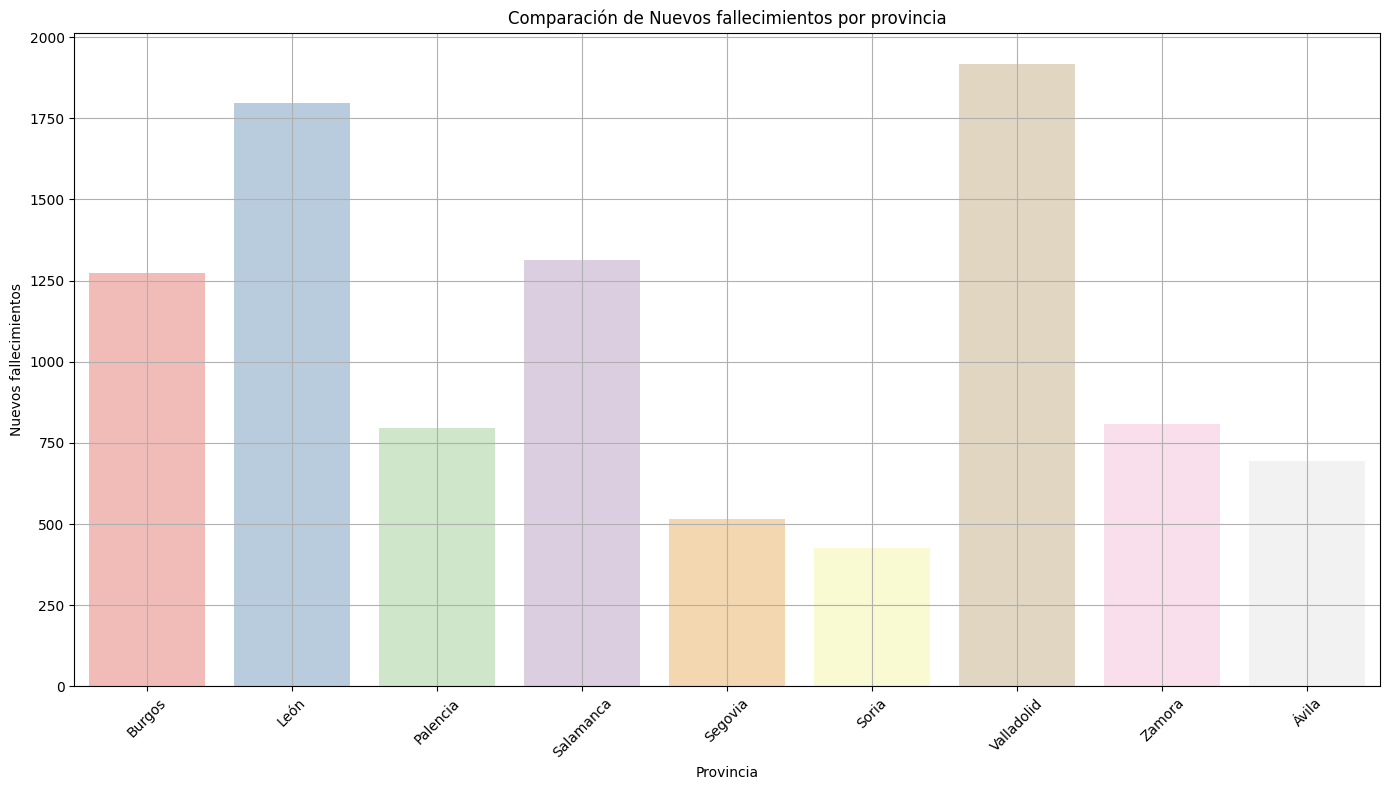

In [175]:
#Representación comparativa entre provincias del número de fallecimientos
df_provincia = df_hospitales.groupby('provincia')['nuevos_fallecimientos'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='provincia', y='nuevos_fallecimientos', data=df_provincia,hue='provincia',palette='Pastel1')
plt.title('Comparación de Nuevos fallecimientos por provincia')
plt.xlabel('Provincia')
plt.ylabel('Nuevos fallecimientos')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

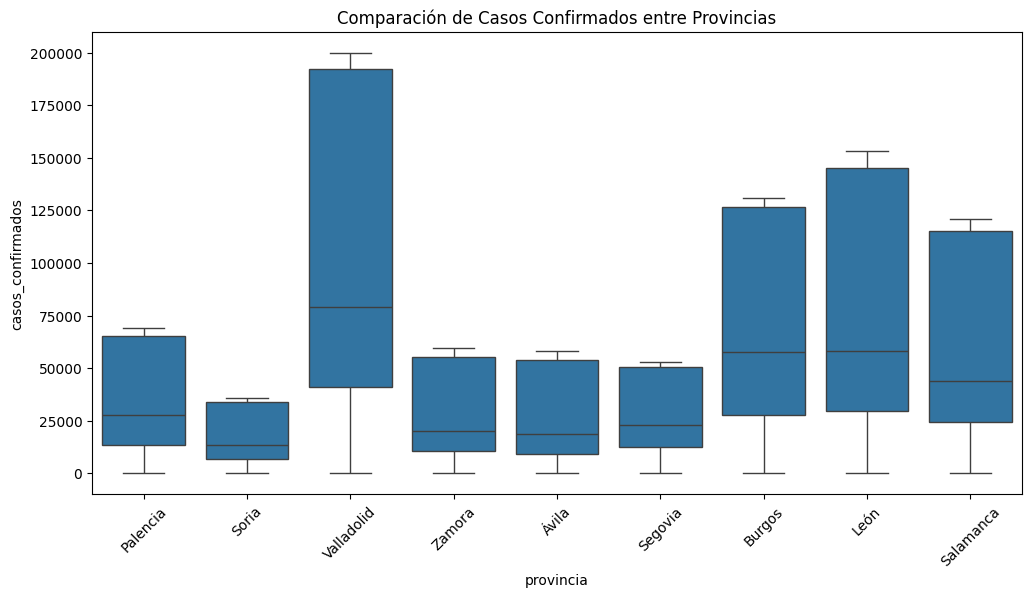

In [176]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='provincia', y='casos_confirmados')
plt.title('Comparación de Casos Confirmados entre Provincias')
plt.xticks(rotation=45)
plt.show()

## Correlación entre variables

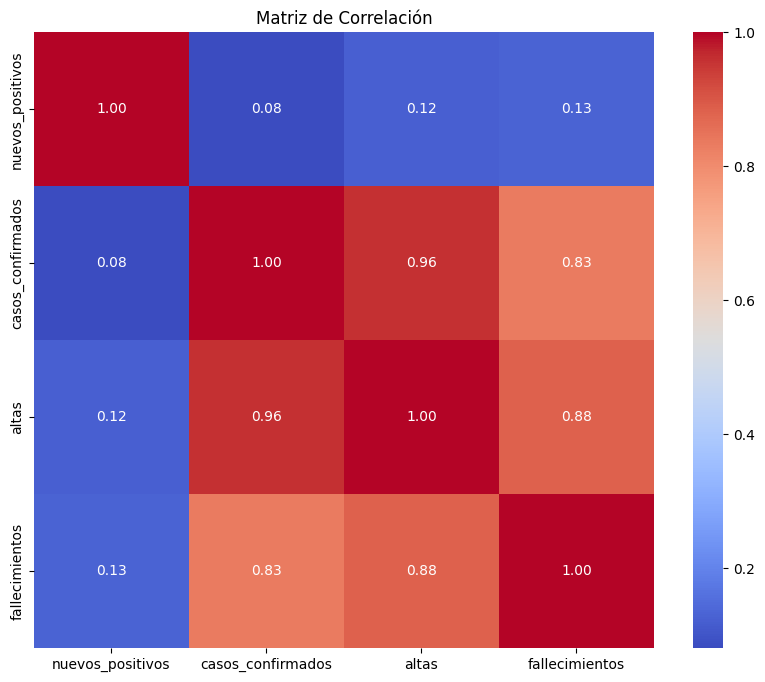

In [177]:
#Representación de la matriz de correlación de parámetros de la situación epidemiológica
correlation_df = df[['nuevos_positivos', 'casos_confirmados', 'altas', 'fallecimientos']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

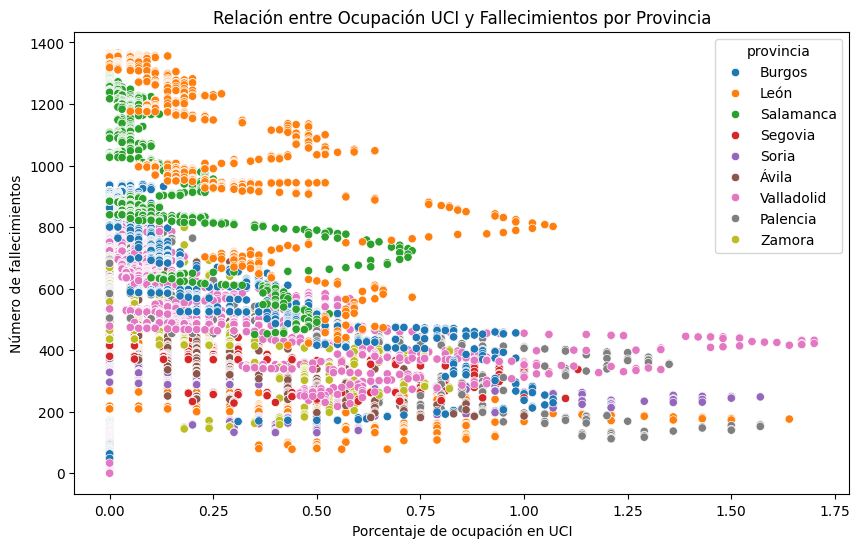

In [178]:
#Representación de la relación entre fallecimientos y el porcentaje de ocupacion en UCI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_hospitales, x='porcentaje_ocupacion_uci', y='fallecimientos', hue='provincia')
plt.title('Relación entre Ocupación UCI y Fallecimientos por Provincia')
plt.xlabel('Porcentaje de ocupación en UCI') 
plt.ylabel('Número de fallecimientos') 
plt.show()